## Manipulating data with `polars`, `pandas`, and `seaborn`

In [29]:
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from jmspack.utils import apply_scaling
import session_info

In [30]:
session_info.show(write_req_file=False)

In [2]:
# df=pl.read_csv("https://www.stats.govt.nz/assets/Uploads/Annual-enterprise-survey/Annual-enterprise-survey-2021-financial-year-provisional/Download-data/annual-enterprise-survey-2021-financial-year-provisional-csv.csv")

In [3]:
df=pl.read_csv("https://github.com/mwaskom/Waskom_CerebCortex_2017/blob/master/data/punch_data.csv?raw=true")

In [4]:
df.shape

(13500, 48)

In [5]:
df.head()

run_trial,trial_type,context,early,stim,cue,motion,color,context_freq,cue_dur,trial_dur,color_freq,context_entropy,congruent,target,block,run,iti,cue_time,condition_trial,color_switch,context_switch,frame_switch,motion_switch,frame_id,cue_onset,stim_onset,response,rt,correct,motion_signal,color_signal,dropped_frames,answered,response_switch,evidence_switch,context_switch_lag,previous_congruent,active_dur,model_dur,color_prob,context_prob,pe_context,surprisal,entropy,information,volatility,subj
i64,str,str,bool,bool,i64,str,str,f64,f64,f64,f64,f64,bool,f64,i64,i64,f64,f64,i64,bool,bool,bool,bool,str,f64,f64,str,f64,bool,f64,f64,f64,bool,bool,bool,i64,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
0,"""early""","""motion""",true,true,1,"""down""","""green""",0.5,1.0,3.0,0.5,0.693147,true,1.0,0,1,7.0,7.0,0,true,true,false,true,"""b""",7.004022,8.020575,"""middle""",1.207926,true,0.321167,0.160333,1.0,true,null,true,1,null,2.207926,2.494579,0.45329,0.54671,0.45329,0.603836,0.688777,6.926075,0.144382,"""pc07"""
1,"""early""","""color""",true,true,0,"""down""","""red""",0.5,1.0,3.0,0.5,0.693147,false,0.0,0,1,7.0,17.0,1,true,true,true,false,"""d""",16.987056,18.003831,"""index""",1.772109,true,0.332,0.164667,1.0,true,true,true,1,true,2.772109,2.494579,0.478419,0.478419,0.521581,0.737268,0.692215,6.968734,0.143498,"""pc07"""
2,"""early""","""motion""",true,true,1,"""down""","""green""",0.5,1.0,3.0,0.5,0.693147,true,1.0,0,1,3.0,23.0,2,true,true,true,false,"""b""",23.00352,24.019971,"""middle""",1.005322,true,0.338,0.161667,1.0,true,true,false,1,false,2.005322,2.494579,0.458107,0.541893,0.458107,0.612687,0.689633,7.011782,0.142617,"""pc07"""
3,"""early""","""color""",true,true,0,"""down""","""red""",0.5,1.0,3.0,0.5,0.693147,false,0.0,0,1,2.0,28.0,3,true,true,true,false,"""d""",28.002948,29.020172,"""middle""",1.505597,false,0.3365,0.1475,1.0,true,false,true,1,true,2.505597,2.494579,0.480845,0.480845,0.519155,0.73221,0.692413,7.033201,0.142183,"""pc07"""
4,"""catch""","""color""",true,false,1,null,null,0.5,1.0,1.0,0.5,0.693147,false,null,0,1,3.0,34.0,4,null,false,true,null,"""c""",34.003253,null,null,null,true,null,null,null,true,null,null,2,false,1.0,1.0,0.500519,0.500519,0.499481,0.69211,0.693147,6.980132,0.143264,"""pc07"""


In [6]:
len(df.columns)
# np.array(df.columns), np.array(df.dtypes)
df.null_count()

run_trial,trial_type,context,early,stim,cue,motion,color,context_freq,cue_dur,trial_dur,color_freq,context_entropy,congruent,target,block,run,iti,cue_time,condition_trial,color_switch,context_switch,frame_switch,motion_switch,frame_id,cue_onset,stim_onset,response,rt,correct,motion_signal,color_signal,dropped_frames,answered,response_switch,evidence_switch,context_switch_lag,previous_congruent,active_dur,model_dur,color_prob,context_prob,pe_context,surprisal,entropy,information,volatility,subj
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,4500,4500,0,4500,0,0,0,0,4500,0,0,0,0,0,4470,0,0,4470,0,0,4500,4744,4744,0,4500,4500,4500,0,4891,4470,0,15,0,0,0,0,0,0,0,0,0,0


In [7]:
# df.select([pl.col("^run_trial|run$")])
# df.fill_null()

In [22]:
plot_df = (
    df
    .groupby(by=["subj", "run_trial"])
    .mean()
    .to_pandas()
    .drop(["cue_dur", "run"], axis=1)
    .set_index(["subj", "run_trial"])
    .select_dtypes("number")
    .pipe(apply_scaling)
    .sort_index()
)
plot_df.head()

cue  context_freq  trial_dur  color_freq  context_entropy  \
subj run_trial                                                                
pc07 0          1.000      0.842697   0.857143         0.0         0.646912   
     1          0.375      0.842697   0.642857         0.0         0.646912   
     2          0.500      0.640449   0.642857         0.0         0.646912   
     3          0.500      0.235955   0.714286         0.0         0.646912   
     4          0.250      0.640449   0.642857         0.0         0.646912   

                  target  block       iti  cue_time  condition_trial  ...  \
subj run_trial                                                        ...   
pc07 0          0.428571    0.0  0.540541  0.000000         0.000000  ...   
     1          0.183673    0.0  0.108108  0.012216         0.034483  ...   
     2          0.571429    0.0  0.351351  0.025559         0.068966  ...   
     3          0.428571    0.0  0.378378  0.039090         0.103448  ...   
     4          0.542857    0.0  0.459459  0.053373         0.137931  ...   

                context_switch_lag  active_dur  model_dur  color_prob  \
subj run_trial                                                          
pc07 0                    0.000000    0.787828   0.840325    0.485560   
     1                    0.162791    0.712312   0.735613    0.470335   
     2                    0.302326    0.655227   0.699944    0.446030   
     3                    0.279070    0.591084   0.699179    0.333097   
     4                    0.488372    0.628925   0.628605    0.243770   

                context_prob  pe_context  surprisal   entropy  information  \
subj run_trial                                                               
pc07 0              0.738105    0.261895   0.248774  0.383858     0.968121   
     1              0.938990    0.061010   0.056333  0.254143     0.969736   
     2              0.806480    0.193520   0.198724  0.178144     0.973521   
     3              0.399681    0.600319   0.609483  0.334537     0.980355   
     4              0.814745    0.185255   0.175529  0.263852     0.972351   

                volatility  
subj run_trial              
pc07 0            0.015368  
     1            0.015279  
     2            0.014958  
     3            0.010462  
     4            0.015874  

[5 rows x 26 columns]

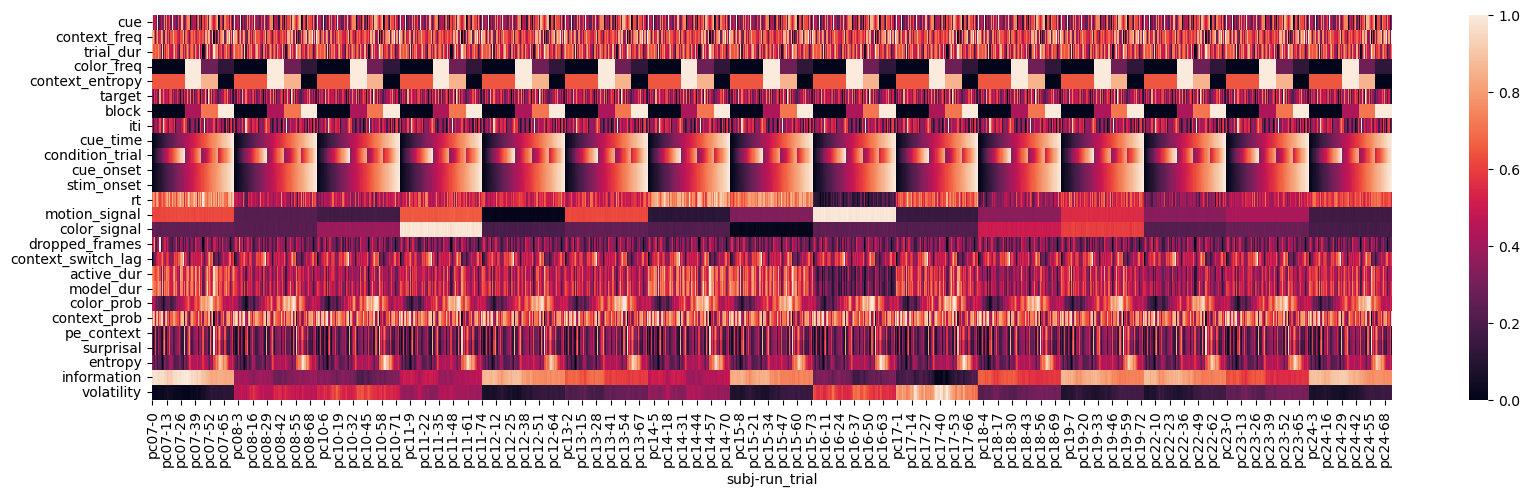

In [24]:
_ = plt.figure(figsize=(20, 5))
_ = sns.heatmap(data=plot_df.T)